# Assignment 1 
### Xinyu (Ashlee) Feng Feb 4, 2018

# Question 1

In [1]:
import numpy as np 
import pandas as pd 
import sys
import glob

filenames = glob.glob('/Users/fqk/appliedgenomics2018/assignments/assignment1/*.chrom.sizes')

index = ["Total genome size", "Number of chromosomes", "Largest chromosome size", "Largest chromosome name", \
"Smallest chromosome size", "Smallest chromosome name", "Mean chromosome length"]

results = pd.DataFrame(index = index)

for filename in filenames:
# 	print "Parsing", filename
	tokens = filename.split('/')[-1].split('.')
	species = tokens[0]
	df = pd.read_csv(filename, sep='\t', header=None, names=["chr", "size"])
	total_size = df["size"].sum(0)
	nchrom = len(df)
	max_chrom_size = max(df["size"])
	max_chrom_name = str(df["chr"][np.argmax(df["size"])])
	min_chrom_size = min(df["size"])
	min_chrom_name = str(df["chr"][np.argmin(df["size"])])
	mean_chrom_len = df["size"].mean(0)

	results[species] = [total_size, nchrom, max_chrom_size, max_chrom_name, \
	                    min_chrom_size, min_chrom_name, mean_chrom_len]

print results

                                 ce10          dm6        ecoli         hg38  \
Total genome size           100286070    137547960      4639211   3088269832   
Number of chromosomes               7            7            1           24   
Largest chromosome size      20924149     32079331      4639211    248956422   
Largest chromosome name          chrV        chr3R        Ecoli         chr1   
Smallest chromosome size        13794      1348131      4639211     46709983   
Smallest chromosome name         chrM         chr4        Ecoli        chr21   
Mean chromosome length    1.43266e+07  1.96497e+07  4.63921e+06  1.28678e+08   

                                 rice       TAIR10     yeast          zm4  
Total genome size           373245519    119146348  12157105   2106338117  
Number of chromosomes              12            5        17           10  
Largest chromosome size      43270923     30427671   1531933    307041717  
Largest chromosome name          Chr1         Chr1     

# Question 2
## Q2.1: How many As, Cs, Gs, Ts are found in the entire genome

In [2]:
filename2 = '/Users/fqk/appliedgenomics2018/assignments/assignment1/yeast.fa'
file2 = open (filename2)

base2count = {} # Q2.1
gc_list = []
counter = 0
num_gc = 0
chrom_ends = []
chrom_names = []

for line in file2:
    line = line.rstrip('\n')
    if line[0] == '>':
        chrom_ends.append(len(gc_list))
        chrom_names.append(line.rstrip("\n").lstrip(">"))
        continue
    for base in line:
        
        # Q2.1
        if base not in base2count:
            base2count[base] = 1
        else:
            base2count[base] += 1
        
        # Q2.2
        if counter == 100:
            gc_list.append(num_gc)
            counter = 0
            num_gc = 0
        
        if base == 'G' or base == 'C':
            num_gc += 1
        
        counter += 1
        
file2.close()

total_count = 0

for base ,count in base2count.items():
    total_count += count

for base, count in base2count.items():
    print "Number of " + base + "s = " + str(count)       

Number of As = 3766349
Number of Cs = 2320576
Number of Ts = 3753080
Number of Gs = 2317100


## Q2.2: Make a scatterplot of the %GC of 100bp windows across the genome

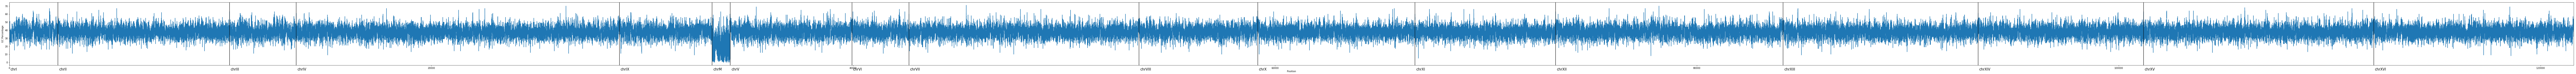

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(200, 5));
plt.plot(gc_list);
for xv in chrom_ends:
    plt.axvline(xv, color='k')

for i in range(len(chrom_ends)):
    start = chrom_ends[i]
    name = chrom_names[i]
    plt.text(start + 50, -10, name, fontsize=15)
    
plt.xlim([0, len(gc_list)])
plt.xlabel("Position")
plt.ylabel("GC Percentage")
plt.savefig("gc.pdf")
plt.show();

### (Plot attached at the end)

## Q 2.3. Make a histogram of the number of genomic bins of a given %GC

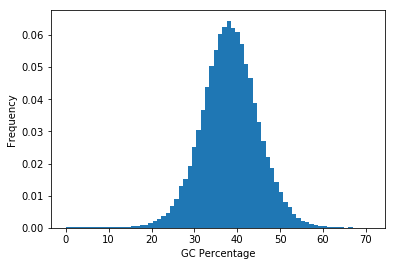

In [4]:
h = plt.hist(gc_list, bins = 70, normed = 1)
plt.xlabel("GC Percentage")
plt.ylabel("Frequency")
plt.show()

## Question 2.4. What fraction of the genome do you expect to sequence poorly?

In [5]:
bins = h[1]
freq = h[0]

poor_fraction = 0

for i in range(len(freq)):
    value = bins[i+1]
    if value < 30 or value > 65:
        poor_fraction += freq[i]

print("%.2f%%" % (poor_fraction*100))

8.50%
